In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpers import *

from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter, MultipleLocator

# pandas formatting
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 200)

In [2]:
# import tables
csas_requests = sql("SELECT * FROM csas2_csasrequest", database='dmapps_0')
request_reviewers = sql("SELECT * FROM csas2_requestreviewer", database='dmapps_0')
tors = sql("SELECT * FROM csas2_termsofreference", database='dmapps_0')
tor_reviewers = sql("SELECT * FROM csas2_torreviewer", database='dmapps_0')

TODO:
* histograms of days
* heatmap total days, days since reminder
* calculate number of business days on average, for 5 calendar days
* aggregate by number of reviewers

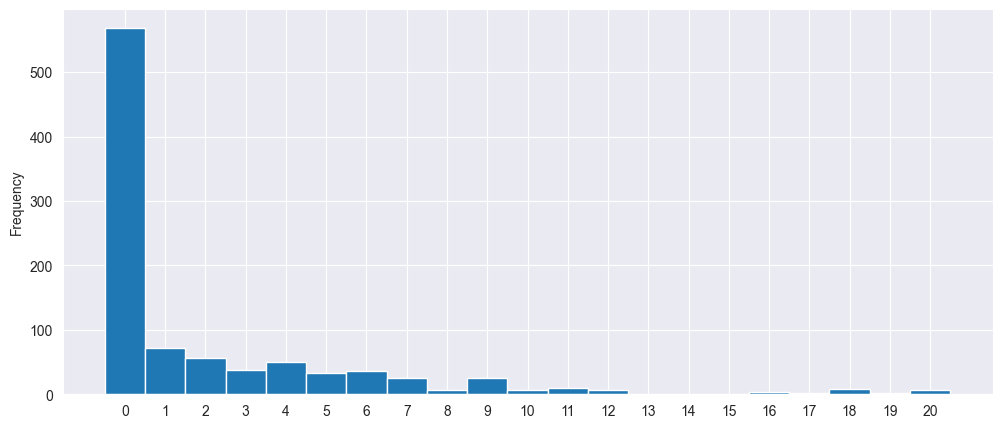

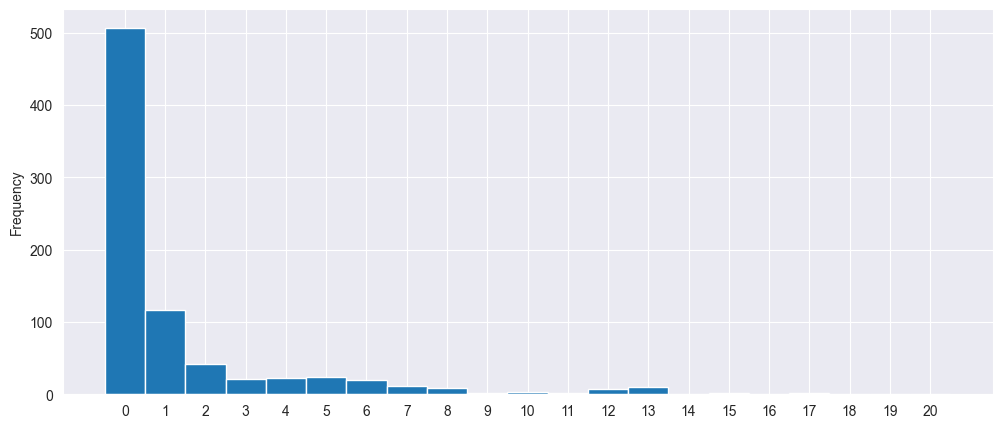

In [3]:
def plot_review_hist(dataframe, n_days=20, figsize=(12,5)):
    n_days += 1

    filtered_reviewers = dataframe[
        (dataframe.review_completed - dataframe.review_started).dt.days <= n_days
    ]
    
    diff_days = (filtered_reviewers.review_completed - filtered_reviewers.review_started).dt.days
    
    ax = diff_days.plot(
        kind='hist', 
        bins=n_days, 
        range=(0, n_days), 
        figsize=figsize
    )
    
    bin_edges = np.linspace(0, n_days, n_days + 1)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    ax.set_xticks(bin_centers)
    ax.set_xticklabels([f"{int(center)}" for center in bin_centers])
    
    plt.show()


plot_review_hist(request_reviewers, 20)
plot_review_hist(tor_reviewers, 20)

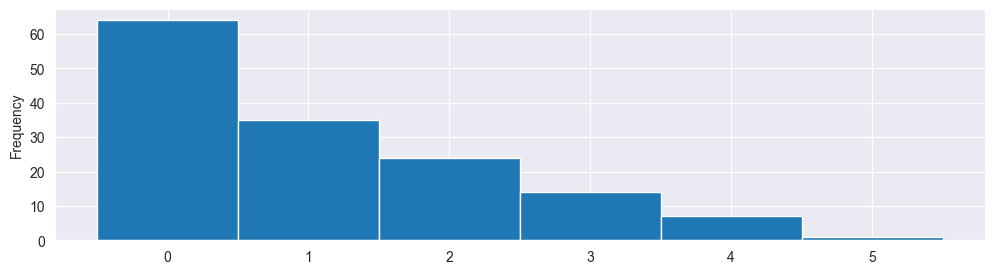

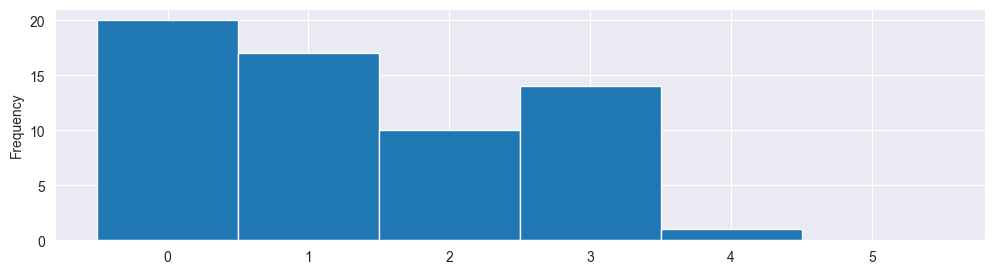

In [6]:
def days_since_notification_hist(dataframe, n_days=5, figsize=(12,3)):
    n_days += 1

    days_since_notification = (dataframe.review_completed - dataframe.reminder_sent).dt.days
    
    ax = days_since_notification.plot(
        kind='hist', 
        bins=n_days, 
        range=(0, n_days), 
        figsize=figsize
    )
    
    bin_edges = np.linspace(0, n_days, n_days + 1)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    ax.set_xticks(bin_centers)
    ax.set_xticklabels([f"{int(center)}" for center in bin_centers])
    
    plt.show()
    
days_since_notification_hist(request_reviewers)
days_since_notification_hist(tor_reviewers)

In [23]:
def df_days(dataframe):
    days_to_complete = (dataframe.review_completed - dataframe.review_started).dt.days
    days_since_notification = (dataframe.review_completed - dataframe.reminder_sent).dt.days
    
    return pd.DataFrame({
        'to_complete': days_to_complete,
        'since_notification': days_since_notification,
    })

df_r = df_days(request_reviewers)
df_r[(df_r.to_complete>=5) & (df_r.since_notification.notnull())].groupby('since_notification').count()

,to_complete
since_notification,
0.0,64
1.0,34
2.0,23
3.0,13
4.0,7
5.0,1
9.0,1
10.0,2
13.0,1


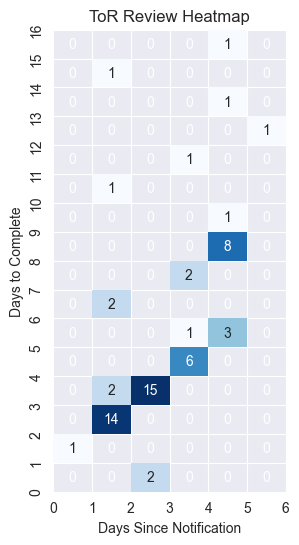

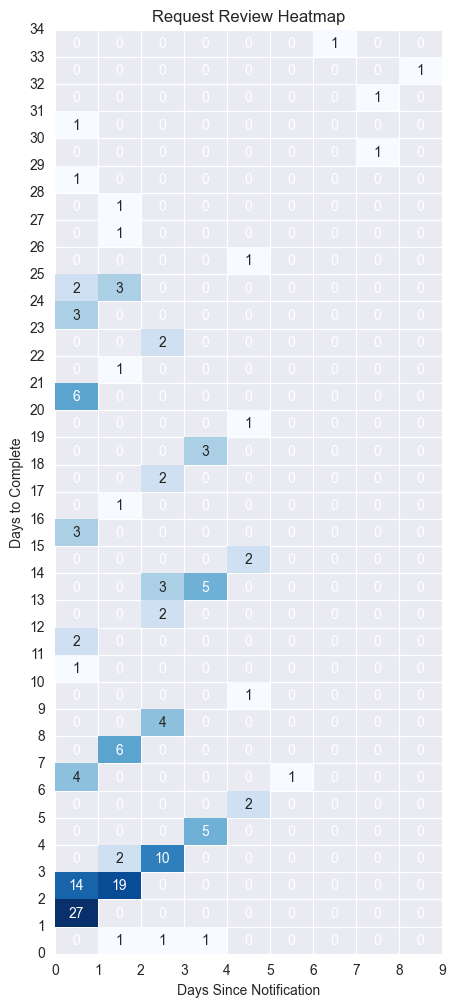

In [4]:
def plot_review_heatmap(dataframe, name, figsize=(4,8)):
    days_to_complete = (dataframe.review_completed - dataframe.review_started).dt.days
    days_since_notification = (dataframe.review_completed - dataframe.reminder_sent).dt.days
    
    heatmap_data = pd.DataFrame({
        'Days to Complete': days_to_complete,
        'Days Since Notification': days_since_notification,
    })
    
    heatmap_pivot = heatmap_data.pivot_table(
        index='Days to Complete', 
        columns='Days Since Notification',
        aggfunc='size', 
        fill_value=0
    )
    

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        heatmap_pivot, 
        cmap='Blues', 
        annot=True, 
        cbar=False, 
        fmt='.0f',
        norm=LogNorm()
    )

    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}'))
    ax.invert_yaxis()
    
    plt.title(f'{name} Review Heatmap')
    plt.xlabel('Days Since Notification')
    plt.ylabel('Days to Complete')
    plt.show()
    
    plt.show()
    
    
plot_review_heatmap(tor_reviewers, 'ToR', figsize=(3,6))
plot_review_heatmap(request_reviewers, 'Request', figsize=(5,12))

In [ ]:
# how many business days is 5 calendar days?



In [ ]:
# how long vs how many reviewers?

